In [1]:
import pandas as pd 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# data preprossessing
print("transform 'super_strict_30', 'super_strict_60', 'long_term' as 'strict'")

change_test = []
for i in test.cancellation_policy:
    if i == 'super_strict_30':
        change_test.append('strict')
    elif i == 'super_strict_60':
        change_test.append('strict')
    elif i == 'long_term':
        change_test.append('strict')
    else:
        change_test.append(i)
        
change_train = []
for j in train.cancellation_policy:
    if j == 'super_strict_30':
        change_train.append('strict')
    elif j == 'super_strict_60':
        change_train.append('strict')
    else:
        change_train.append(j)
        
train.cancellation_policy = change_train
test.cancellation_policy = change_test

# label encodeing
le = preprocessing.LabelEncoder()

# encoding room types
le_roomtype = le.fit(train.room_type)
train_room_type = le_roomtype.transform(train.room_type)
test_room_type = le_roomtype.transform(test.room_type)
print("'Entire home/apt', 'Private room', 'Shared room' are encoded as"\
      ,le_roomtype.transform(['Entire home/apt', 'Private room', 'Shared room']))

# encoding cities
le_city = le.fit(train.city)
train_city = le_city.transform(train.city)
test_city = le_city.transform(test.city)
print("'NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston' are encoded as"\
      ,le_city.transform(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston']))

#encoding cleaning fee
le_cleaning = le.fit(train.cleaning_fee)
train_cleaning = le_cleaning.transform(train.cleaning_fee)
test_cleaning = le_cleaning.transform(test.cleaning_fee)
print("'True', 'False' are encoded as"\
      ,[1,0])

transform 'super_strict_30', 'super_strict_60', 'long_term' as 'strict'
'Entire home/apt', 'Private room', 'Shared room' are encoded as [0 1 2]
'NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston' are encoded as [4 5 2 3 1 0]
'True', 'False' are encoded as [1, 0]


In [4]:
# replace encoded label
train.room_type = train_room_type
test.room_type = test_room_type
train.city = train_city
test.city = test_city
train.cleaning_fee = train_cleaning
test.cleaning_fee = test_cleaning

# filter useable variables
useful_variable = ['cancellation_policy','accommodates','number_of_reviews','room_type','city','cleaning_fee']

train = train[useful_variable]
test = test[useful_variable]

# split features and target
x = ['accommodates','number_of_reviews','room_type','city','cleaning_fee']
y = ['cancellation_policy']

x_train, x_test = train[x], test[x]
y_train, y_test = train[y], test[y]

In [5]:
# start KNN classification, try K value is 5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, np.ravel(y_train))
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4726 1199 1965]
 [1878 1562 2947]
 [2618 2522 6041]]
              precision    recall  f1-score   support

    flexible       0.51      0.60      0.55      7890
    moderate       0.30      0.24      0.27      6387
      strict       0.55      0.54      0.55     11181

    accuracy                           0.48     25458
   macro avg       0.45      0.46      0.46     25458
weighted avg       0.48      0.48      0.48     25458



Text(0.5, 1.0, 'Accuracy Score vs. K Value')

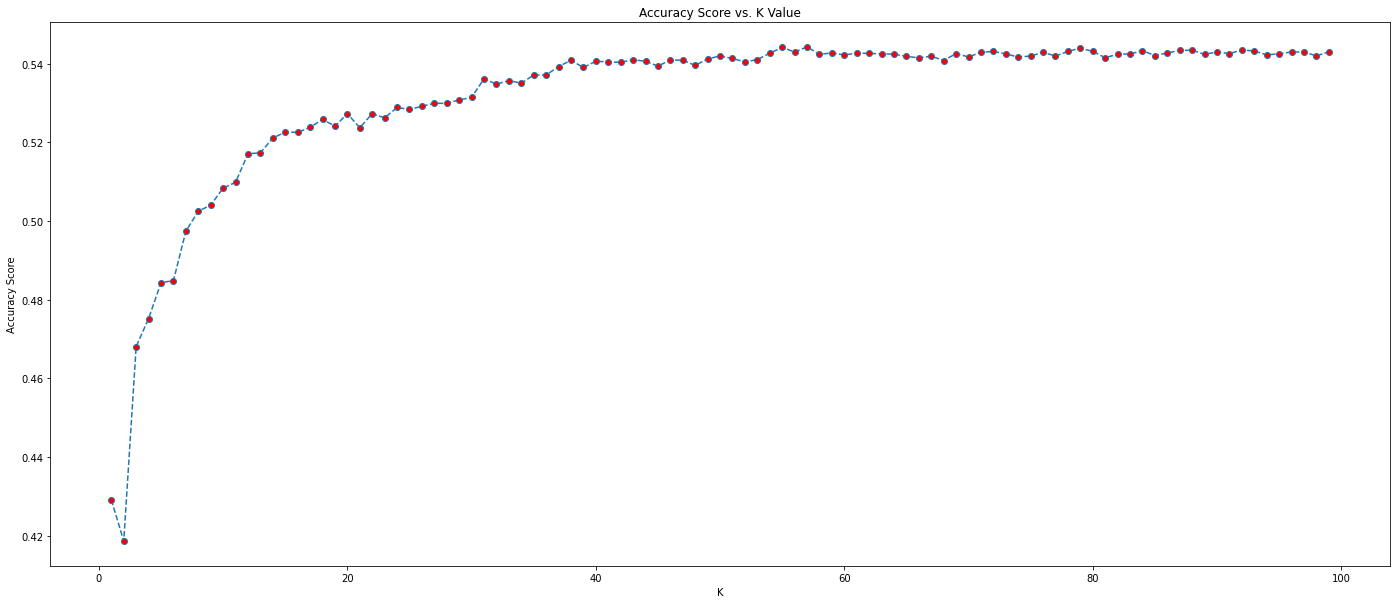

In [6]:
# optimizing by accuracy score
acc = []
for i in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, np.ravel(y_train))
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(24,10))
plt.plot(range(1,100), acc, 'o', linestyle='dashed', markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. K Value')

In [7]:
acc.index(max(acc))

56

In [8]:
classifier = KNeighborsClassifier(n_neighbors=56)
classifier.fit(x_train, np.ravel(y_train))
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4788  394 2708]
 [1479  544 4364]
 [2043  648 8490]]
              precision    recall  f1-score   support

    flexible       0.58      0.61      0.59      7890
    moderate       0.34      0.09      0.14      6387
      strict       0.55      0.76      0.63     11181

    accuracy                           0.54     25458
   macro avg       0.49      0.48      0.45     25458
weighted avg       0.50      0.54      0.50     25458



In [9]:
from sklearn.metrics import log_loss
pred_loss = classifier.predict_proba(x_test)
log_loss(y_test, pred_loss)

0.9639654620901569

Text(0.5, 1.0, 'Accuracy Score vs. K Value')

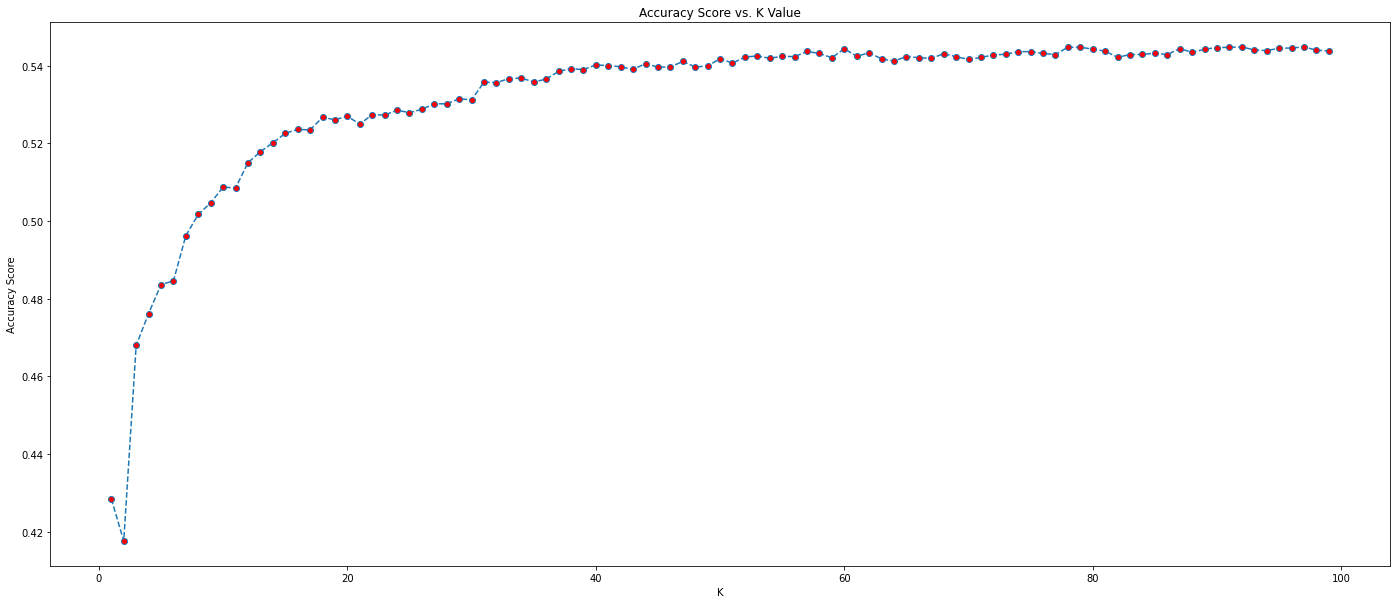

In [10]:
# optimizing by accuracy score with balltree algorithm
acc = []
for i in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors=i, algorithm='ball_tree')
    classifier.fit(x_train, np.ravel(y_train))
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(24,10))
plt.plot(range(1,100), acc, 'o', linestyle='dashed', markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. K Value')

In [11]:
max(acc)

0.5448581978160106

Text(0.5, 1.0, 'Accuracy Score vs. K Value')

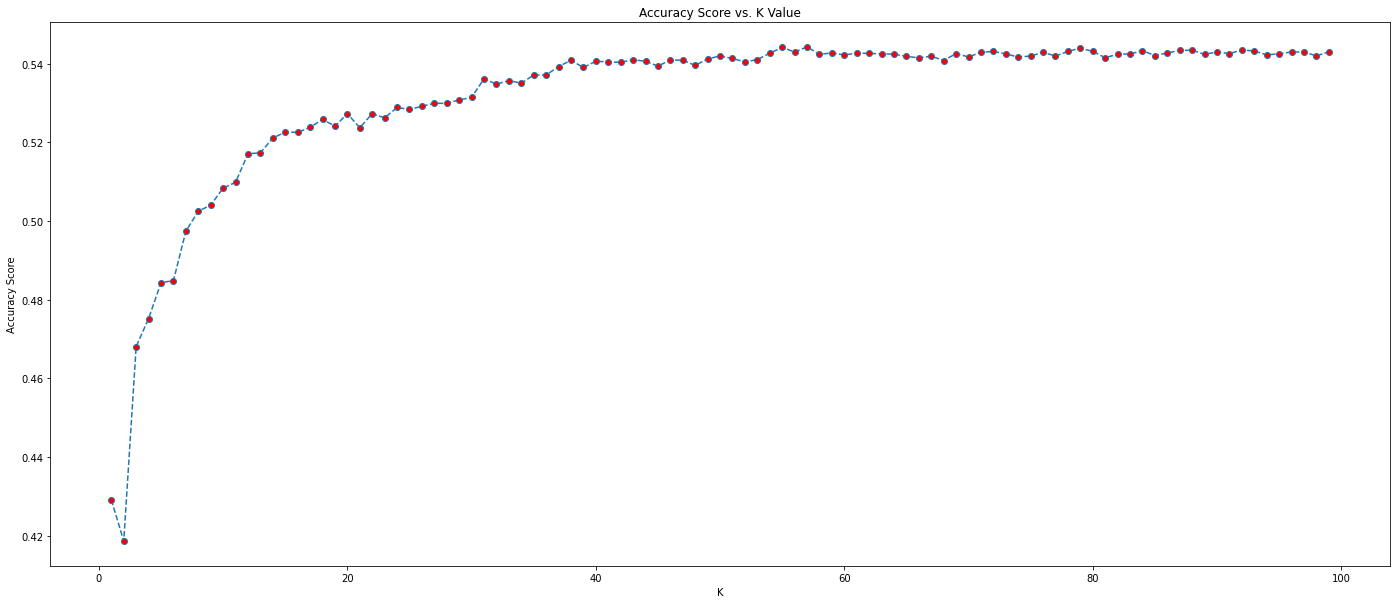

In [12]:
# optimizing by accuracy score with kd tree algorithm
acc = []
for i in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
    classifier.fit(x_train, np.ravel(y_train))
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(24,10))
plt.plot(range(1,100), acc, 'o', linestyle='dashed', markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. K Value')